In [2]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import scipy
import statistics
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
import os

In [3]:
path = os.getcwd()
heart_df = pd.read_csv(path+'\\Learn Dataset\\heart_disease_missing.csv')
#iris_df = pd.read_csv(path+"\\Iris_Kaggle_PDF\\iris_train.csv")
heart_df_nona = heart_df.dropna()
heart_df_nona["cp"] = heart_df_nona.loc[:,"cp"].replace("Asympt.",0).replace("Atypical",1).replace("Non",2).replace("Typical",3)
heart_df_nona["restecg"] = heart_df_nona.loc[:,"restecg"].replace("Normal",0).replace("ST-T wave",1).replace("LV hyper", 2)
heart_df_nona["slope"] = heart_df_nona.loc[:,"slope"].replace("down",0).replace("flat",1).replace("up",2)
heart_df_nona["thal"] = heart_df_nona.loc[:,"thal"].replace("Revers.",0).replace("Normal",1).replace("Fixed",2)


### The above decription suggests the presence of 

<Figure size 864x864 with 0 Axes>

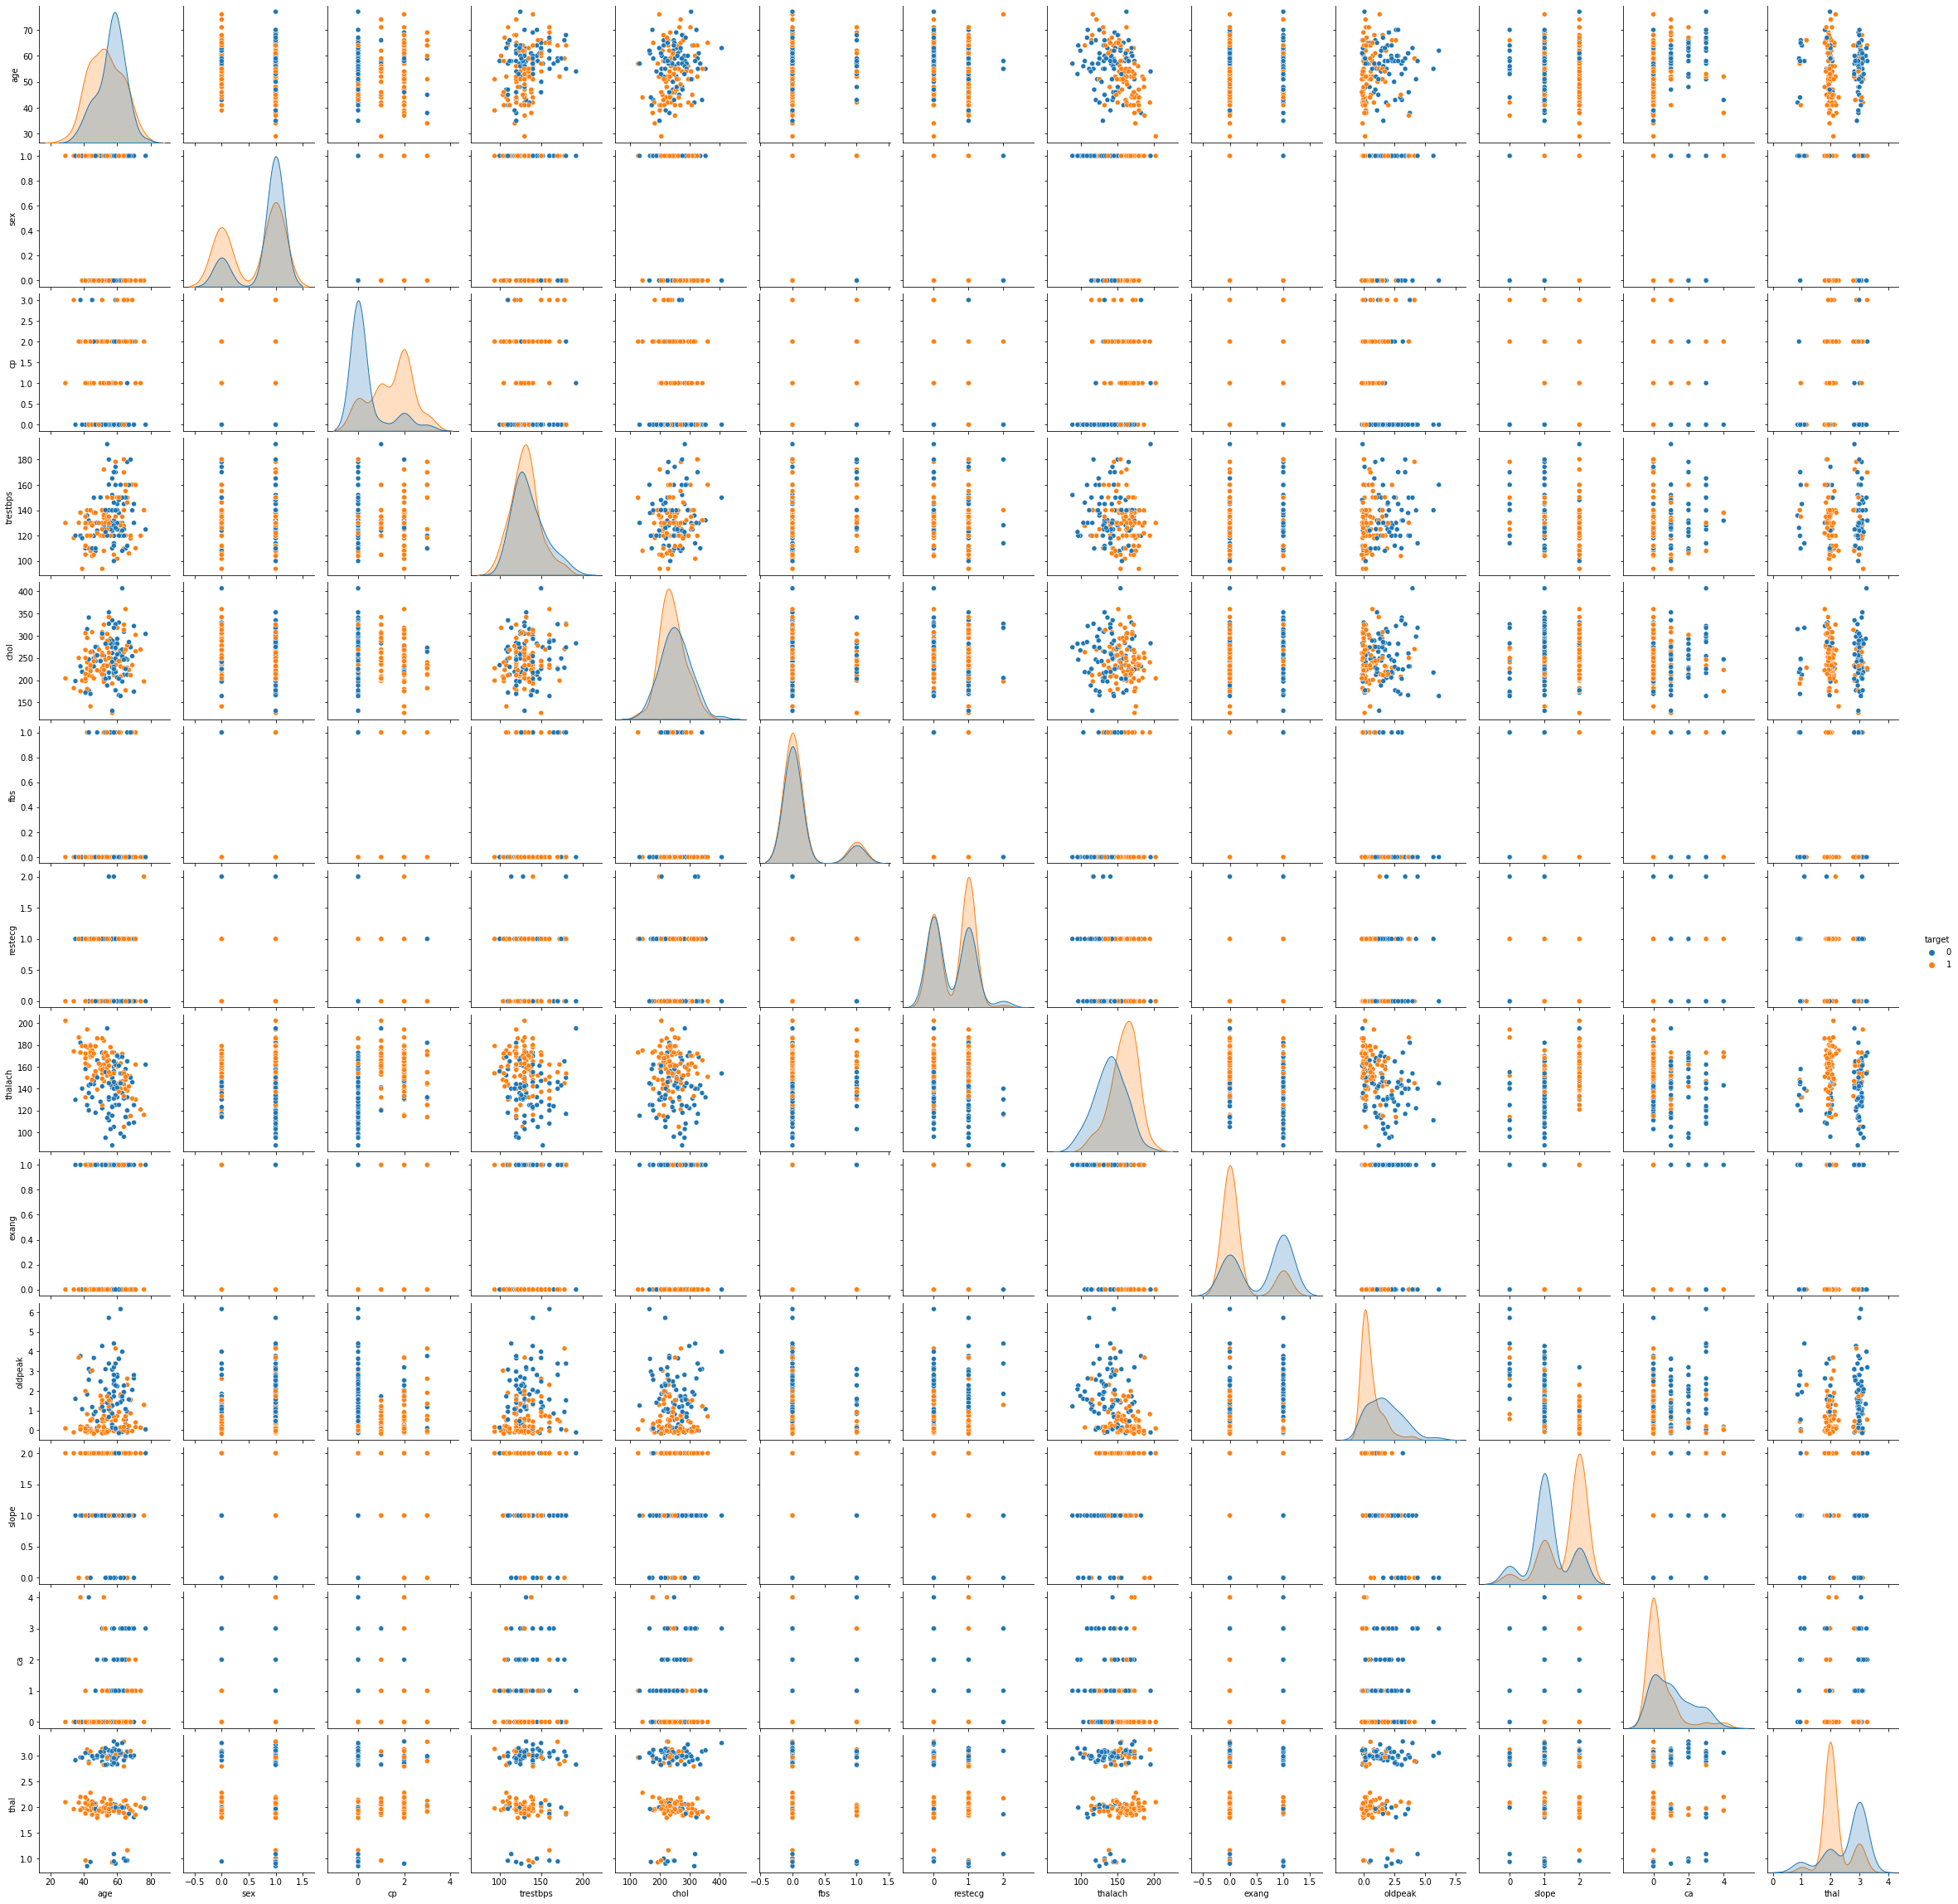

In [4]:
fig1 = plt.figure(figsize=(12,12))
sn = sns.pairplot(heart_df_nona,hue='target', dropna=True)
sn.savefig("CM1_Heart.png")

In [5]:
heart_df_nona.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.162805 -0.094568  0.311194  0.184968  0.058412   
sex      -0.162805  1.000000 -0.058450 -0.080464 -0.198022  0.047452   
cp       -0.094568 -0.058450  1.000000 -0.008539 -0.078022  0.053333   
trestbps  0.311194 -0.080464 -0.008539  1.000000  0.158249  0.166439   
chol      0.184968 -0.198022 -0.078022  0.158249  1.000000 -0.033144   
fbs       0.058412  0.047452  0.053333  0.166439 -0.033144  1.000000   
restecg  -0.104239 -0.072782 -0.030776 -0.112712 -0.094489 -0.139330   
thalach  -0.418467 -0.051201  0.288617 -0.109834 -0.073405  0.021496   
exang     0.117830  0.090487 -0.396391  0.064888  0.086526  0.075085   
oldpeak   0.132613  0.103859 -0.177998  0.160363  0.073519 -0.081840   
slope    -0.151080 -0.098354  0.184471 -0.175388  0.010260 -0.039972   
ca        0.260586  0.146411 -0.207397  0.072259  0.038942  0.109652   
thal      0.031341  0.235369 -0.157975  0.022846  0.004097  0.021199   
target   -0.177700 -0.249585  0.531465 -0.117806 -0.114501  0.010362   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.104239 -0.418467  0.117830  0.132613 -0.151080  0.260586   
sex      -0.072782 -0.051201  0.090487  0.103859 -0.098354  0.146411   
cp       -0.030776  0.288617 -0.396391 -0.177998  0.184471 -0.207397   
trestbps -0.112712 -0.109834  0.064888  0.160363 -0.175388  0.072259   
chol     -0.094489 -0.073405  0.086526  0.073519  0.010260  0.038942   
fbs      -0.139330  0.021496  0.075085 -0.081840 -0.039972  0.109652   
restecg   1.000000 -0.017183 -0.001014 -0.039762  0.052756 -0.081353   
thalach  -0.017183  1.000000 -0.387369 -0.363022  0.462101 -0.192047   
exang    -0.001014 -0.387369  1.000000  0.262387 -0.327414  0.079687   
oldpeak  -0.039762 -0.363022  0.262387  1.000000 -0.674435  0.156793   
slope     0.052756  0.462101 -0.327414 -0.674435  1.000000 -0.080760   
ca       -0.081353 -0.192047  0.079687  0.156793 -0.080760  1.000000   
thal     -0.006021 -0.116345  0.167880  0.185610 -0.160397  0.112082   
target    0.067840  0.438963 -0.449802 -0.456554  0.427994 -0.307917   

              thal    target  
age       0.031341 -0.177700  
sex       0.235369 -0.249585  
cp       -0.157975  0.531465  
trestbps  0.022846 -0.117806  
chol      0.004097 -0.114501  
fbs       0.021199  0.010362  
restecg  -0.006021  0.067840  
thalach  -0.116345  0.438963  
exang     0.167880 -0.449802  
oldpeak   0.185610 -0.456554  
slope    -0.160397  0.427994  
ca        0.112082 -0.307917  
thal      1.000000 -0.352234  
target   -0.352234  1.000000

In [24]:
features = ["exang","thal","ca","cp"]

heart_df_sub = heart_df_nona.copy()
for i in heart_df_nona.columns:
    if i not in features and i not in ["target"]:
        heart_df_sub.drop(columns = [i], inplace=True)
heart_df_sub

cp  exang  ca  thal  target
0     2      0   0     1       1
1     0      0   0     1       1
2     2      0   0     1       1
3     0      1   2     0       0
4     0      0   0     1       1
..   ..    ...  ..   ...     ...
191   1      0   0     1       1
192   0      0   0     0       0
193   2      0   0     0       1
194   1      0   0     1       1
195   0      0   0     1       1

[179 rows x 5 columns]

In [23]:
cols = heart_df_nona.columns
for i in cols:
    try:
        print("Skew of ",i, scipy.stats.skew(heart_df_nona.loc[:,i]))
        print("Kurtosis of ",i, scipy.stats.kurtosis(heart_df_nona.loc[:,i]))
        print("Mean of ",i, statistics.mean(heart_df_nona.loc[:,i]))
        print("Variance of ",i, statistics.variance(heart_df_nona.loc[:,i]))
        print("")
    except:
        pass


Skew of  age -0.2081813553625888
Kurtosis of  age -0.6174029445538709
Mean of  age 55.09497206703911
Variance of  age 85.4459858138221

Skew of  sex -0.8072875102923988
Kurtosis of  sex -1.3482868757259001
Mean of  sex 0.6871508379888268
Variance of  sex 0.21618228610884438

Skew of  cp 0.5163770958069526
Kurtosis of  cp -1.1764768002712227
Mean of  cp 0.8994413407821229
Variance of  cp 0.9785951917644844

Skew of  trestbps 0.30962634103809283
Kurtosis of  trestbps -0.16264443837938236
Mean of  trestbps 135.38329773587722
Variance of  trestbps 1232.629721129242

Skew of  chol 1.2066084201594358
Kurtosis of  chol 3.4699567114715943
Mean of  chol 250.55689390861122
Variance of  chol 4041.9614082782555

Skew of  fbs 1.779890150696346
Kurtosis of  fbs 1.1680089485458618
Mean of  fbs 0.16759776536312848
Variance of  fbs 0.14029251145565252

Skew of  restecg 0.022345341889146123
Kurtosis of  restecg -1.9824509387755107
Mean of  restecg 0.9888268156424581
Variance of  restecg 0.98863850354654

In [39]:
heart_df_X = heart_df_sub.copy().drop(columns=["target"])
heart_df_Y = heart_df_sub.copy().drop(columns=features)

In [40]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(heart_df_X, heart_df_Y, test_size = 0.2, random_state = 275)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size = 0.2, random_state= 275)

Text(0.5, 1.0, 'KNN classifier; Iris Dataset; No data cleaning')

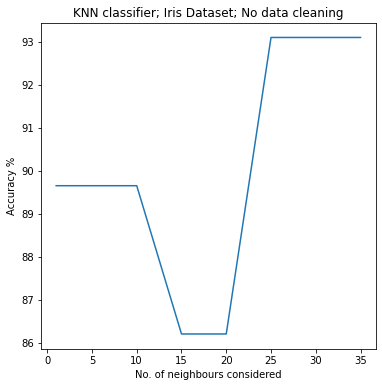

In [41]:
k_n = [1, 5, 10, 15, 20, 25, 30, 35]
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k)
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; Iris Dataset; No data cleaning')

### One can notice that the performance of KNN classifier on the plain dataset is not very good over the given range of K values. The best performance is attained at K = 25

In [107]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = sklearn.preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return sklearn.metrics.roc_auc_score(y_test, y_pred, average='weighted')

### To compute roc curve in multiclass setting, we are using one hot encoding to encode the different classes

In [42]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(heart_df_X, heart_df_Y, test_size = 0.2, random_state = 275)
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size = 0.2, random_state= 275)
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = sklearn.metrics.roc_auc_score(Y_test, Y_pred, average='weighted')
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='weighted')
print('AUC Score; K = 25; heart - No cleaning...',auc_score)
print('Accuracy; K = 25, heart - No cleaning...',aucc_score)
print('F-score; K = 25, heart - No cleaning...', f_score)

AUC Score; K = 25; heart - No cleaning... 0.6857585139318885
Accuracy; K = 25, heart - No cleaning... 0.6944444444444444
F-score; K = 25, heart - No cleaning... 0.6858683061569991


# Dealing with outliers

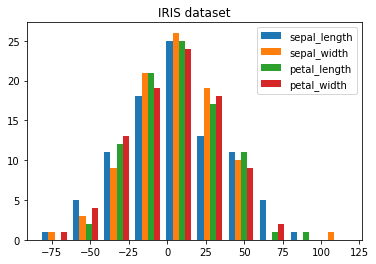

In [308]:
iris_df_X = iris_df.copy()
iris_df_X = iris_df.dropna().drop(columns=['species'])
iris_df_Y = iris_df.dropna().drop(columns=["sepal_length","sepal_width","petal_length","petal_width"])
n_bins = 10
plt.hist([iris_df_X.iloc[:,0],iris_df_X.iloc[:,1],iris_df_X.iloc[:,2], iris_df_X.iloc[:,3]],n_bins)
plt.title('IRIS dataset')
plt.legend(["sepal_length","sepal_width","petal_length","petal_width"])
plt.show()

### One can notice outliers in sepal_width, sepal_length and petal_length on either extremes of the histogram.

In [309]:
thres = 70
outlier_ = iris_df_X[iris_df_X['sepal_length']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_width']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_length']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_width']>thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_length']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['sepal_width']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_width']<-thres]

iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)
outlier_ = iris_df_X[iris_df_X['petal_length']<-thres]
iris_df_X.drop(index = list(outlier_.index), inplace=True)
iris_df_Y.drop(index = list(outlier_.index), inplace=True)

### We have removed the outliers that lie outside the [-70, 70] range. Having negative values in measurement of length and width does not seem to make sense. As very little information is given on how these values were measured and the unit of measurement, it is hard to take a call on whether to consider negative values or not. Moreover, since almost all the entries have atleast one negative value in them, we will try to work with negative values as such.

# Normalization
### We will perform Z-score normalization on each attribute entries to normalize the data entries by subtracting it with mean and dividing each entry by standard deviation.

In [52]:
heart_df_X_norm = heart_df_X.copy()
for i in heart_df_X.columns:
    heart_df_X_norm[i] = (heart_df_X.loc[:,i] - heart_df_X.describe().loc['mean',i])/heart_df_X.describe().loc['std',i]
heart_df_Y_norm = heart_df_Y.copy()
heart_df_X_norm.describe()

cp         exang            ca          thal
count  179.000000  1.790000e+02  1.790000e+02  1.790000e+02
mean     0.000000 -1.984756e-17 -9.923781e-18 -6.946647e-17
std      1.000000  1.000000e+00  1.000000e+00  1.000000e+00
min     -0.909225 -7.080854e-01 -7.126413e-01 -1.102848e+00
25%     -0.909225 -7.080854e-01 -7.126413e-01 -1.102848e+00
50%      0.101652 -7.080854e-01 -7.126413e-01  5.844150e-01
75%      1.112530  1.404369e+00  2.762176e-01  5.844150e-01
max      2.123407  1.404369e+00  3.242794e+00  2.271678e+00

Best K is... 7
AUC Score; K = 7 ; heart  ... 0.8333333333333334
Accuracy; K = 7 ; heart  ... 0.8333333333333334
F-score; K = 7 ; heart ... 0.8328173374613004


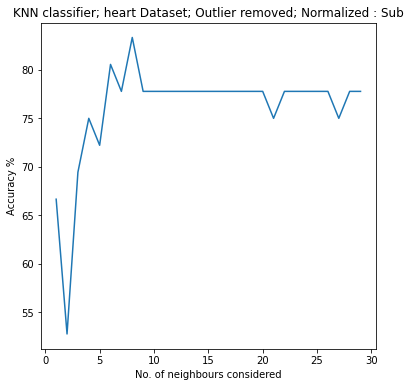

In [57]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(heart_df_X_norm, heart_df_Y_norm, test_size = 0.4, random_state = 275)
X_test, X_val, Y_test, Y_val = sklearn.model_selection.train_test_split(X_test, Y_test, test_size = 0.5, random_state= 275)
k_n = range(1,30)
score_list = []
for k in k_n:
    knn_model = KNeighborsClassifier(n_neighbors= k, metric = 'manhattan')
    knn_model.fit(X_train,Y_train)
    Y_val_pred = knn_model.predict(X_val)
    pred_score = sklearn.metrics.accuracy_score(Y_val, Y_val_pred, normalize=True) * 100
    score_list.append(pred_score)
fig2 = plt.figure(figsize=(6,6))
plt.plot(k_n,score_list)
plt.xlabel('No. of neighbours considered')
plt.ylabel('Accuracy %')
plt.title('KNN classifier; heart Dataset; Outlier removed; Normalized : Sub')
best_k = score_list.index(max(score_list))
print('Best K is...', best_k)
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric = 'manhattan')
knn_model.fit(X_train,Y_train)
Y_pred = knn_model.predict(X_test)
auc_score = sklearn.metrics.roc_auc_score(Y_test, Y_pred, average='weighted')
aucc_score = sklearn.metrics.accuracy_score(Y_test,Y_pred, normalize=True)
f_score = sklearn.metrics.f1_score(Y_test, Y_pred, average='weighted')
print('AUC Score; K =',best_k,'; heart  ...',auc_score)
print('Accuracy; K =',best_k,'; heart  ...',aucc_score)
print('F-score; K =',best_k,'; heart ...', f_score)

In [324]:
a = score_list.index(max(score_list))
a

12

## Handling negative values

In [67]:
iris_df.describe()

sepal_length  sepal_width  petal_length  petal_width
count    105.000000    99.000000     98.000000   103.000000
mean       4.483455     8.833197      6.901250     1.072824
std       30.853799    29.513908     27.901687    30.057568
min      -64.939919   -63.292986    -47.211576   -83.378535
25%      -16.095345    -7.273014    -12.107943   -20.686096
50%        4.238235    11.598673      6.257712     1.785393
75%       20.896169    26.123211     25.398957    22.570313
max       86.373997   118.661487     84.863246    70.661911

### The IRIS dataset is plagued with negative entries that denote distance which makes no sense. Shifting the entire dataset to positive side has little to no impact on KNN classifier performance as doing so preserves the physical distribution of the points with respect to one another. Meaning, shifting simply does not change the distance between points. So we will first eliminate negative entries from our dataset.

In [147]:
iris_df_X = iris_df.copy()
iris_df_X = iris_df_X.drop(columns=['species']).dropna()
df_len = iris_df_X
neg_labels = []
for i in range(len(iris_df_X)):
    if min(iris_df_X.iloc[i,:])<0:
        neg_labels.append(i)


In [148]:
len(neg_labels)

80

In [149]:
len(iris_df_X)

90